In [1]:
%matplotlib inline

import numpy as np
import networkx as nx
import matplotlib
import re
import os
import sys
import time
import itertools
import seaborn
import matplotlib.pyplot as plt


import matplotlib.cm as cm
from matplotlib.colors import Normalize



from scipy.spatial.distance import pdist
clrs = seaborn.color_palette("RdBu_r",n_colors=9)
seaborn.set(style='ticks',font_scale=2)

sys.path.append("/Users/Yves/Documents/Code/structural_knowledge/projects/")
import graph_transitions as gt

# List of directed graphs with degree 2 and 9 vertices 

In [2]:
poke_pos = [  [265,456],
         [184,475],[347,475],
    [116,518],[265,518],[414,518],
         [184,561],[347,561],
              [265,580]]

In [3]:
poke_pos = [  [149,0],
         [68,19],[231,19],
       [0,62],[149,62],[298,62],
         [68,105],[231,105],
              [149,124]]

In [22]:
edges = [[i-1,i] for i in range(1,9)]
edges.extend([[i+1,i] for i in range(0,8)])

In [17]:
edges

[[0, 1],
 [1, 2],
 [2, 3],
 [3, 4],
 [4, 5],
 [5, 6],
 [6, 7],
 [7, 8],
 [1, 0],
 [2, 1],
 [3, 2],
 [4, 3],
 [5, 4],
 [6, 5],
 [7, 6],
 [8, 7]]

In [18]:
rew_nodes = [0,3,5,8]

In [19]:
layouts = gt.optimize.get_all_valid_physical_layouts(rew_nodes,9)

In [20]:
edge_set = gt.optimize.get_transition_set(edges)

In [161]:
lyt = layouts[1]
all_angle = []
all_dists = []

for lyt in layouts:
    tmpA = []
    tmpD = []

    for kk,e in enumerate(edge_set):
        if len(e)==2:
            tmp1 = gt.optimize.angle_between(np.array(poke_pos[lyt[e[0]]]),
                                            np.array(poke_pos[lyt[kk]]),
                                            np.array(poke_pos[lyt[e[1]]]))
            tmpA.append(tmp1%180)
            
            d_ = np.abs(np.array(poke_pos[lyt[e[0]]]) - np.array(poke_pos[lyt[e[1]]]))
            tmpD.append(d_)
    all_angle.append(tmpA.copy())
    all_dists.append(tmpD.copy())

In [162]:
mu_angle = [np.mean(i) for i in all_angle]
var_angle = [np.std(i) for i in all_angle]
var_dist =   [np.std(i) for i in all_dists]

In [163]:
np.corrcoef(mu_angle,var_angle)

array([[1.        , 0.53993542],
       [0.53993542, 1.        ]])

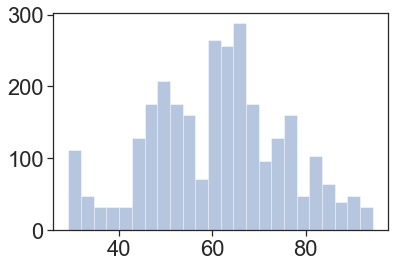

In [164]:
seaborn.distplot(var_dist,kde=0)

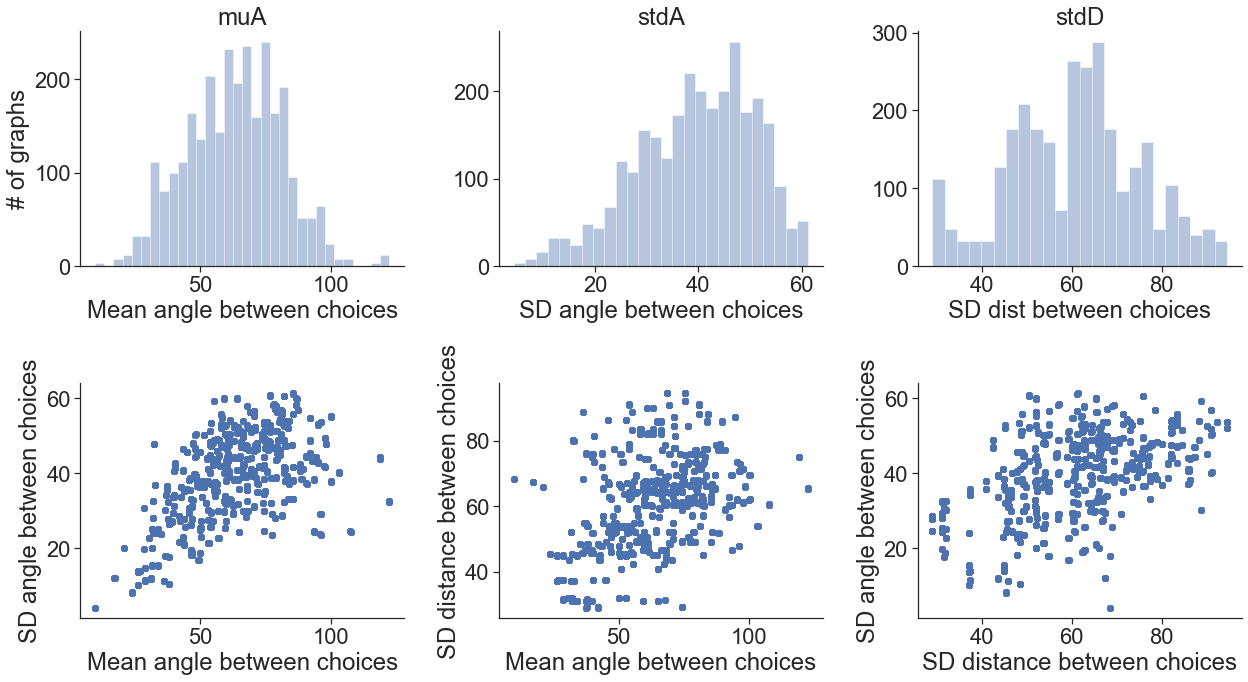

In [180]:
plt.figure(figsize=(18,10))
plt.subplot(2,3,1)
plt.title("muA")
seaborn.distplot(mu_angle,kde=0)
plt.ylabel("# of graphs")
plt.xlabel("Mean angle between choices")

plt.subplot(2,3,2)
plt.title("stdA")
seaborn.distplot(var_angle,kde=0)
plt.xlabel("SD angle between choices")

plt.subplot(2,3,3)
plt.title("stdD")
seaborn.distplot(var_dist,kde=0)
plt.xlabel("SD dist between choices")



plt.subplot(2,3,4)
plt.scatter(mu_angle,var_angle)
plt.ylabel("SD angle between choices")
plt.xlabel("Mean angle between choices")

plt.subplot(2,3,5)
plt.scatter(mu_angle,var_dist)
plt.ylabel("SD distance between choices")
plt.xlabel("Mean angle between choices")

plt.subplot(2,3,6)
plt.scatter(var_dist,var_angle)
plt.ylabel("SD angle between choices")
plt.xlabel("SD distance between choices")

plt.tight_layout()

seaborn.despine()


In [166]:
np.argsort(mu_angle)[-10:]

array([2165, 1528, 1139, 2442,  437, 1740, 2263, 1525, 1354,  616])

In [167]:
np.argsort(mu_angle)[-60:][::6]

array([2293, 1549, 1149, 2179, 1430,  162, 1716, 1360,  714,  437])

In [168]:
np.array(mu_angle)[np.argsort(mu_angle)[-20:]]

array([107.69045917, 107.69045917, 107.69045917, 107.69045917,
       118.95031032, 118.95031032, 118.95031032, 118.95031032,
       119.08816142, 119.08816142, 119.08816142, 119.08816142,
       122.44588181, 122.44588181, 122.44588181, 122.44588181,
       122.5509901 , 122.5509901 , 122.5509901 , 122.5509901 ])

In [169]:
np.array(mu_angle)[np.argsort(mu_angle)[-8*16:][::8]]

array([ 93.57152591,  94.40467379,  95.14185427,  95.17920919,
        96.04492794,  96.23842129,  96.31656624,  97.66956516,
        97.7315115 ,  98.2283865 , 100.00927019, 100.11398064,
       103.05479306, 107.48805913, 118.95031032, 122.44588181])

In [170]:
G = nx.DiGraph()
G.add_edges_from(edges)

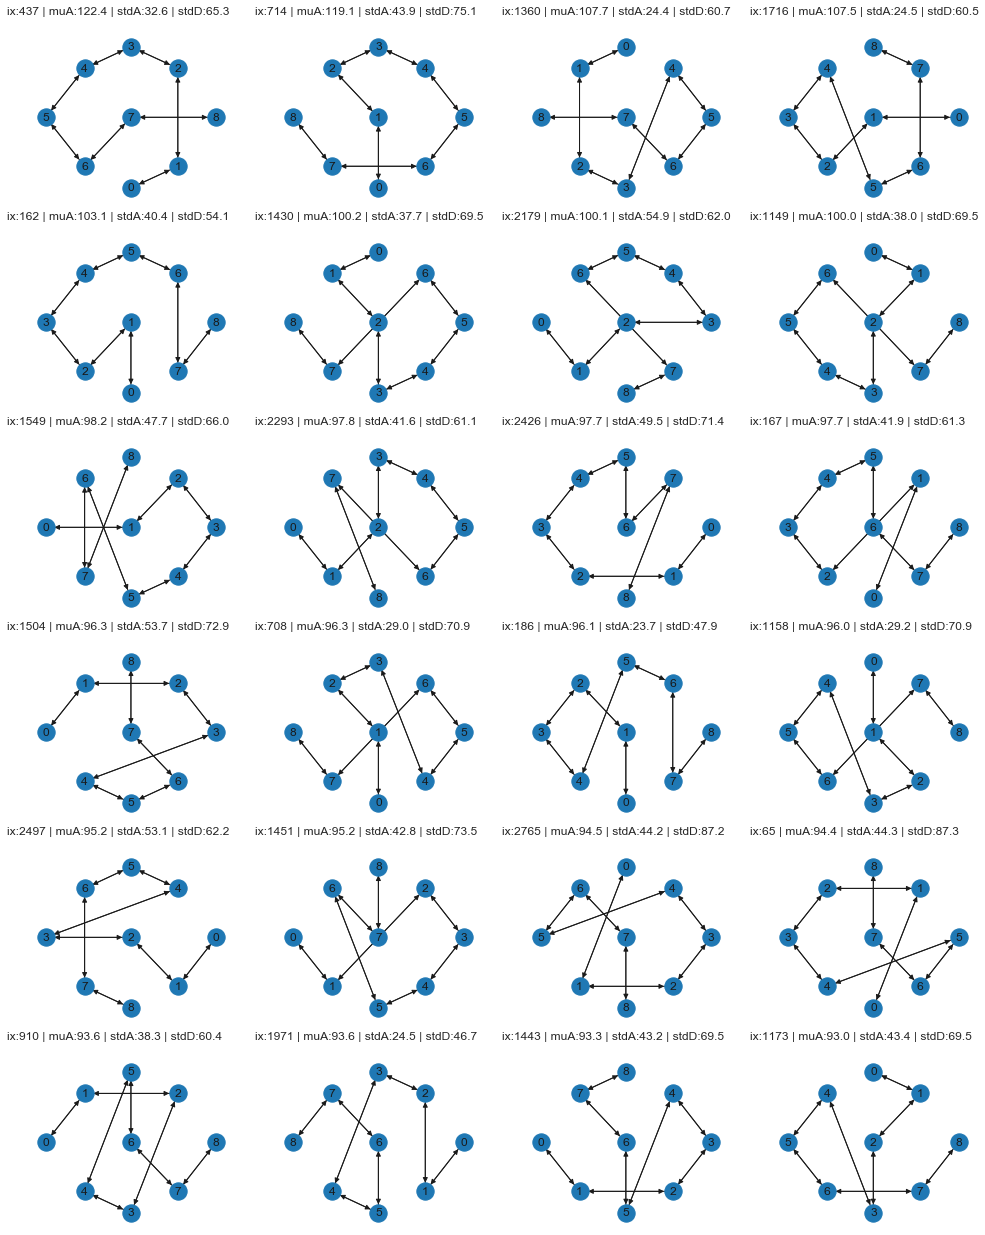

In [178]:
plt.figure(figsize=(17,22))
ijk = 1
for ix in reversed(np.argsort(mu_angle)[-6*24:][::6]):
    plt.subplot(6,4,ijk)
    plt.gca().annotate('ix:{:.0f} | muA:{:.1f} | stdA:{:.1f} | stdD:{:.1f}'.format(ix,mu_angle[ix],var_angle[ix],var_dist[ix]),
                       [-.1,1.1],xycoords='axes fraction',fontsize=12)
    nx.draw(G,
        pos=np.array(poke_pos)[np.array(layouts[ix])],#[np.random.permutation(range(9))],
        connectionstyle='arc3, rad=0.0',
        with_labels=True)
    
    ijk += 1

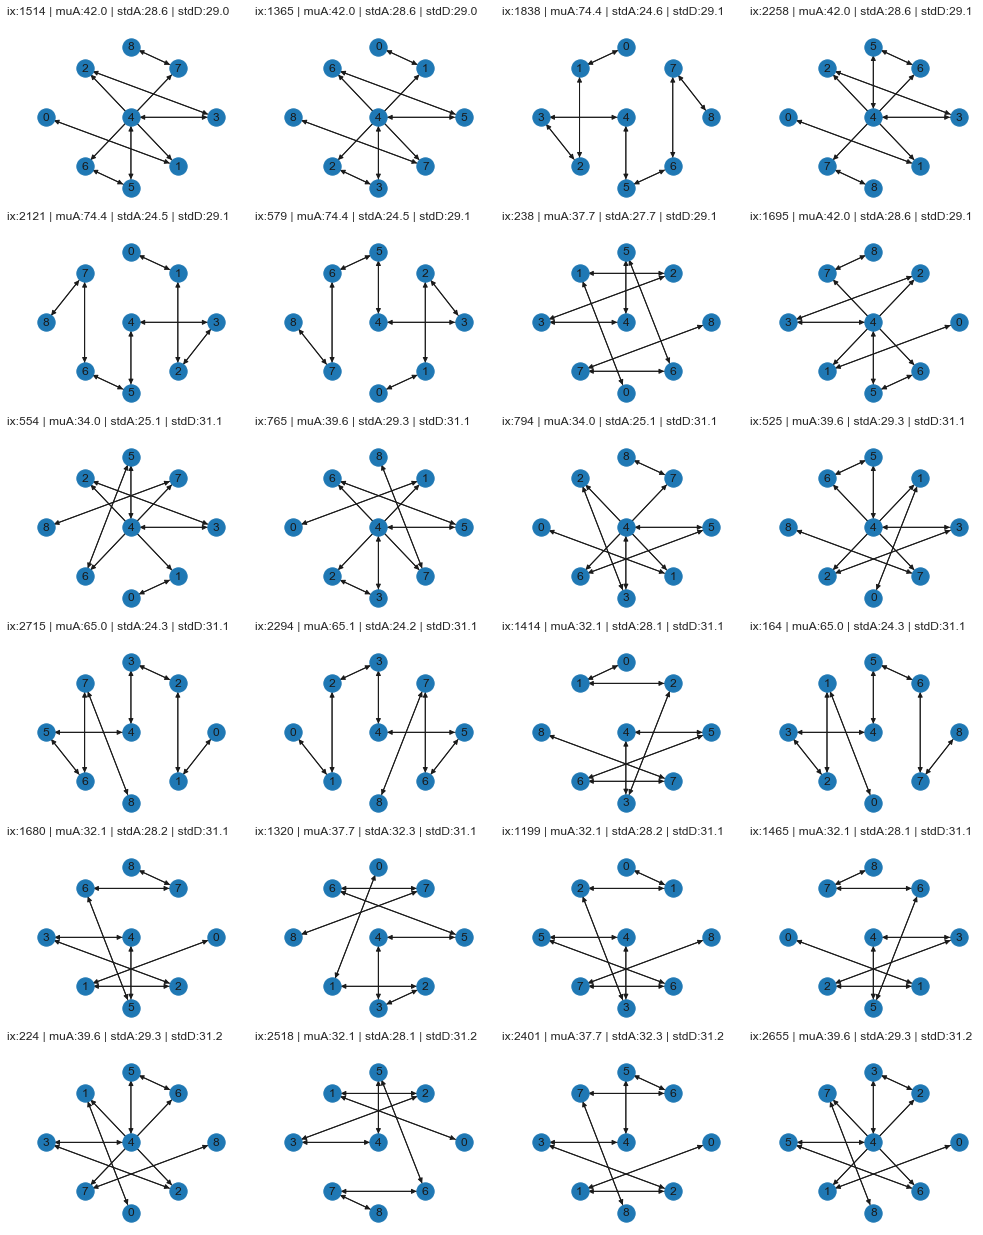

In [179]:
plt.figure(figsize=(17,22))
ijk = 1
for ix in np.argsort(var_dist)[:4*24][::4]:
    plt.subplot(6,4,ijk)
    plt.gca().annotate('ix:{:.0f} | muA:{:.1f} | stdA:{:.1f} | stdD:{:.1f}'.format(ix,mu_angle[ix],var_angle[ix],var_dist[ix]),
                       [-.1,1.1],xycoords='axes fraction',fontsize=12)
    nx.draw(G,
        pos=np.array(poke_pos)[np.array(layouts[ix])],#[np.random.permutation(range(9))],
        connectionstyle='arc3, rad=0.0',
        with_labels=True)
    
    ijk += 1

In [190]:
G

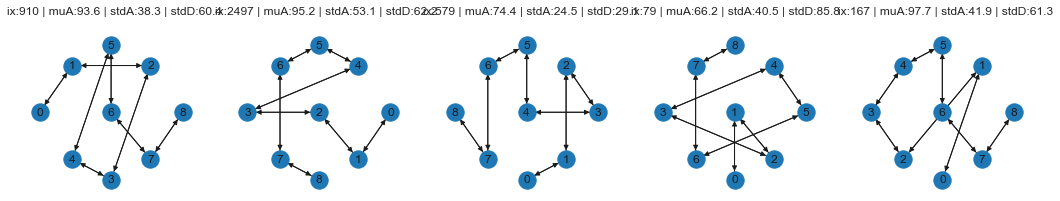

In [189]:
plt.figure(figsize=(18,3))
ijk = 1
for ix in [910,2497,579,79,167]:
    plt.subplot(1,5,ijk)
    plt.gca().annotate('ix:{:.0f} | muA:{:.1f} | stdA:{:.1f} | stdD:{:.1f}'.format(ix,mu_angle[ix],var_angle[ix],var_dist[ix]),
                       [-.1,1.1],xycoords='axes fraction',fontsize=12)
    nx.draw(G,
        pos=np.array(poke_pos)[np.array(layouts[ix])],#[np.random.permutation(range(9))],
        connectionstyle='arc3, rad=0.0',
        with_labels=True)
    
    ijk += 1

# Define rotation functions 

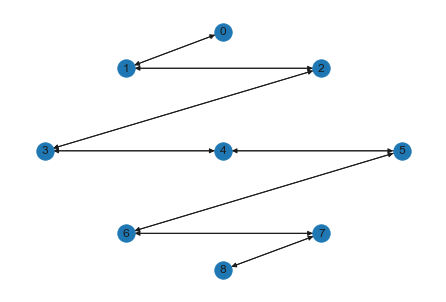

In [261]:
layout = range(9)
#layout = np.array(layouts[ix])
nx.draw(G,
    pos=np.array([1,-1])*np.array(poke_pos)[layout],#[np.random.permutation(range(9))],
    connectionstyle='arc3, rad=0.0',
    with_labels=True)


In [247]:
[3,6,1,8,4,0,,5]

In [272]:
def flip(layout,axis='V'):
    if axis=='V':
        #defines new position of nodes after flip, 
        #node 0 should go to pos 8; node 1 to pos 6 etc
        flip = [8,6,7,3,4,5,1,2,0]
    elif axis=='H':
        flip = [0,2,1,5,4,3,7,6,8]
    else:
        raise ValueError('can only flip vertically ("V")or horizontally ("H")')
        
    layout2 = [flip[i] for i in layout]
    return layout2


def rotate(layout,direction='cw'):
    if direction=='cw':
        #defines new position of nodes after rotation, 
        #node 0 should go to pos 5; node 1 to pos 2 etc
        rot = [5,2,7,0,4,8,1,6,3]  
    elif direction=='ccw':
        rot = [3,6,1,8,4,0,7,2,5]
    else:
        raise ValueError('Can only rotate the graph clockwise ("cw") or counterclockwise ("ccw")')
    
    layout2 = [rot[i] for i in layout]
    return layout2

In [285]:
def rotate(layout,direction='cw'):
    if direction=='cw':
        #defines new position of nodes after rotation, 
        #node 0 should go to pos 5; node 1 to pos 2 etc
        rot = [5,2,7,0,4,8,1,6,3]  
    elif direction=='ccw':
        rot = [3,6,1,8,4,0,7,2,5]
    else:
        raise ValueError('Can only rotate the graph clockwise ("cw") or counterclockwise ("ccw")')
    
    layout2 = [rot[i] for i in layout]
    return layout2

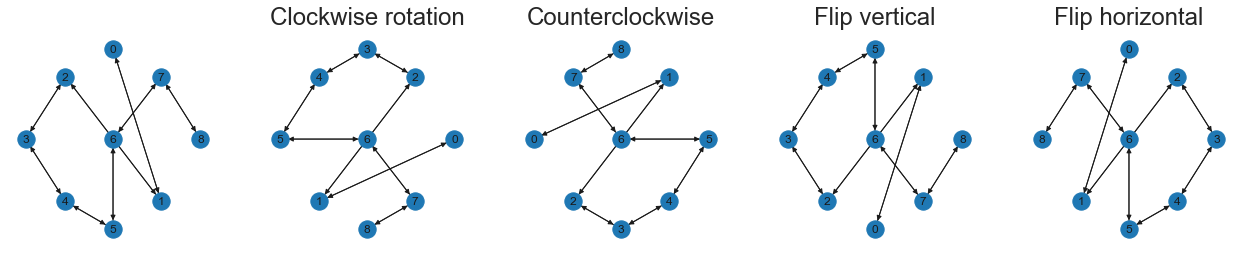

In [289]:
#layout = range(9)#np.array(layouts[ix])
plt.figure(figsize=(22,4))
plt.subplot(1,5,1)
#layout = range(9)
layout = np.array(layouts[ix])
nx.draw(G,
    pos=np.array([1,-1])*np.array(poke_pos)[layout],#[np.random.permutation(range(9))],
    connectionstyle='arc3, rad=0.0',
    with_labels=True)

plt.subplot(1,5,2)
plt.title("Clockwise rotation")
nx.draw(G,
    pos=np.array([1,-1])*np.array(poke_pos)[rotate(layout,'cw')],#[np.random.permutation(range(9))],
    connectionstyle='arc3, rad=0.0',
    with_labels=True)


plt.subplot(1,5,3)
plt.title("Counterclockwise")
nx.draw(G,
    pos=np.array([1,-1])*np.array(poke_pos)[rotate(layout,'ccw')],#[np.random.permutation(range(9))],
    connectionstyle='arc3, rad=0.0',
    with_labels=True)


plt.subplot(1,5,4)
plt.title("Flip vertical")
nx.draw(G,
    pos=np.array([1,-1])*np.array(poke_pos)[flip(layout,'V')],#[np.random.permutation(range(9))],
    connectionstyle='arc3, rad=0.0',
    with_labels=True)


plt.subplot(1,5,5)
plt.title("Flip horizontal")
nx.draw(G,
    pos=np.array([1,-1])*np.array(poke_pos)[flip(layout,'H')],#[np.random.permutation(range(9))],
    connectionstyle='arc3, rad=0.0',
    with_labels=True)


# Dumb test to see if 4 rotations equals full circle 

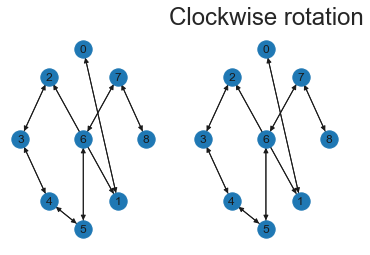

In [292]:
layout = np.array(layouts[ix])
plt.subplot(1,2,1)
nx.draw(G,
    pos=np.array([1,-1])*np.array(poke_pos)[layout],#[np.random.permutation(range(9))],
    connectionstyle='arc3, rad=0.0',
    with_labels=True)

plt.subplot(1,2,2)
plt.title("Clockwise rotation")
nx.draw(G,
    pos=np.array([1,-1])*np.array(poke_pos)[rotate(rotate(rotate(rotate(layout,'cw'))))],#[np.random.permutation(range(9))],
    connectionstyle='arc3, rad=0.0',
    with_labels=True)



# Dumb test two to see that two clockwise rotations is mirror of horitzontal flip

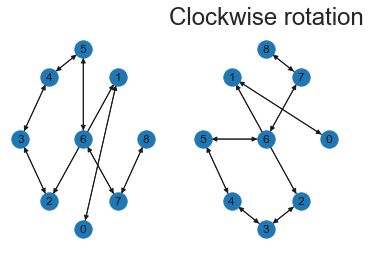

In [296]:
layout = np.array(layouts[ix])
plt.subplot(1,2,1)
nx.draw(G,
    pos=np.array([1,-1])*np.array(poke_pos)[flip(layout)],#[np.random.permutation(range(9))],
    connectionstyle='arc3, rad=0.0',
    with_labels=True)

plt.subplot(1,2,2)
plt.title("Clockwise rotation")
nx.draw(G,
    pos=np.array([1,-1])*np.array(poke_pos)[(flip(rotate(layout,'cw')))],#[np.random.permutation(range(9))],
    connectionstyle='arc3, rad=0.0',
    with_labels=True)



In [ ]:
#Each group should have two different graphs that are not mirrors, rotations etc
#Each graph should appear equally often
#It is an underdetermined problem